# Dimensionamento de floculador hidráulico horizontal

- Roteiro de cálculo adaptado do Exemplo 3-2 do livro de Seckler Filho (2017). Recomenda-se a aquisição do bibliografia de referência (https://www.grupogen.com.br/tratamento-de-agua).
- Use por sua conta e risco. Roteiro em desenvolvimento.

**Prof. Leonardo Damasceno - leonardo.damasceno@unifal-mg.edu.br**

<span style="color:red">**ATENÇÃO!**</span>. Executar o roteiro passo a passo adotando os valores intermediários quando necessário.

### Bibliotecas

In [5]:
import math
import matplotlib.pyplot as plt

### Dados de entrada

In [7]:
vazao = 100 # Vazão de operação em L/s.
TDH = 30 # Tempo de detenção hidráulica em minutos.
Grad = 40 # Gradiente em 1/s.
h = 0.8 # Profundidade da lâmina de água.

temperatura = 20 # Temperatura em graus Celsius.
g = 9.81 # Aceleração da gravidade (m/s2)
mi = 1.002e-3 # Viscosidade cinemática (N.s)/m2
Ro = 998.2 # Densidade da água (kg/m^3)

In [8]:
V = (TDH*60)*(vazao/1000)
Potencia = Grad**2 * mi * V
delta_H = Potencia/(Ro*g*(vazao/1000))
area = V/h
print(f"Volume (V): {V:.2f} m3")
print(f"Potência requerida (Potência): {Potencia:.2f} W")
print(f"Energia dissipada (Delta H): {delta_H:.2f} m")
print(f"Área (A): {area:.2f} m2")

Volume (V): 180.00 m3
Potência requerida (Potência): 288.58 W
Energia dissipada (Delta H): 0.29 m
Área (A): 225.00 m2


<span style="color:red">**ATENÇÃO!**</span> **Escolha do número de canais (nc) e relação comprimento/largura (cl)** 

Observação:
- O número de canais (nc) deve ser maior ou igual a 3.
- A relação comprimento/largura igual a 1 resulta em uma unidade quadrada. Valores superiores a 1 resulta em uma unidade retangular.

In [10]:
nc = 3 # Número de canais adotados.
cl = 1 # Relação comprimento/largura do floculador.

In [11]:
comp_esti = math.sqrt(area*cl)
larg_esti = comp_esti/cl
lcanal_esti = larg_esti/nc

print(f"Largura estimada da unidade: {larg_esti:.2f} m.")
print(f"Comprimento estimado do canal: {comp_esti:.2f} m.")
print(f"Largura estimada do canal: {lcanal_esti:.2f} m.")

#larg_esti = math.sqrt(area) ## Largura da unidade
#lcanal_esti = larg_esti/nc
#comp_esti = lcanal_esti*lc
#print(f"Largura estimada do floculador: {larg_esti:.2f} m.")
#print(f"Número de canais: {nc:.0f}.")
#print(f"Comprimento estimado de cada canal: {comp_esti:.2f} m.")
#print(f"Largura estimada de cada canal do canal: {lcanal_esti:.2f} m.")

Largura estimada da unidade: 15.00 m.
Comprimento estimado do canal: 15.00 m.
Largura estimada do canal: 5.00 m.


<span style="color:red">**ATENÇÃO!**</span> **Escolha da largura do canal (lcanal)** 

Observação: a escolha deverá ser feita em função dos valores acima estimados.

In [13]:
# Adote o valor da largura do canal em função da Largura estimada do canal.
lcanal = 5 # Largura adotada do canal.

larg = lcanal*nc # Largura calculada do floculador
comp = area/larg # Comprimento calculado do floculador
print(f"Comprimento calculado do canal: {comp:.2f} m.")

Comprimento calculado do canal: 15.00 m.


<span style="color:red">**ATENÇÃO!**</span> **Escolha do comprimento do floculador (comp)** 

Observação: a escolha deverá ser feita em função dos valores acima estimados.

In [15]:
# Adote o valor do comprimento do floculador em função do comprimento calculado no passo anterior
comp = 15 # Comprimento adotado do floculador.

V = comp*larg*h # Volume resultante do floculador.
TDH = (V/(vazao/1000))/60 # TDH resultante do floculador.
TDHcanal = TDH/nc # TDH resultante em cada canal
print("Dimensões resultantes do floculador:")
print(f"Comprimento do canal: {comp:.2f} m.")
print(f"Largura do canal: {lcanal:.2f} m.")
print(f"Largura do floculador: {larg:.2f} m.")
print(f"Volume do floculador: {V:.2f} m.")
print(f"TDH do floculador: {TDH:.2f} min.")
print(f"TDH em cada canal: {TDHcanal:.2f} min.")

Dimensões resultantes do floculador:
Comprimento do canal: 15.00 m.
Largura do canal: 5.00 m.
Largura do floculador: 15.00 m.
Volume do floculador: 180.00 m.
TDH do floculador: 30.00 min.
TDH em cada canal: 10.00 min.


<span style="color:red">**ATENÇÃO!**</span> **Número de espaçamentos por canal**

In [17]:
n_esp = 0.045* ((((h*comp*Grad)/(vazao/1000))**2)*TDHcanal)**(1/3)
print(f"Estimativa do número de espaçamentos: {n_esp:.1f} espaçamentos.")

Estimativa do número de espaçamentos: 27.6 espaçamentos.


In [18]:
# Adote o número de espaçamentos com base no valor anterior.
n_esp = 25 # Número de espaçamentos adotado.

espac = comp/n_esp
print(f"Espaçamento entre chicanas: {espac:.2f} m.")
if espac < 0.6:
    print("Atenção! Recomenda-se o espaçamento igual ou superior a 0.6 m!")

Espaçamento entre chicanas: 0.60 m.


In [19]:
Aesc = h*espac
Rh = Aesc/((2*h)+espac)
J = (((vazao/1000)*0.013)/(Aesc*(Rh**(2/3))))**2
Lr = lcanal*n_esp
delta_H_d = J*Lr
vr = (vazao/1000)/(h*espac)
vc = vr*(2/3)
hp = (vazao/1000)/(h*vc)

print(f"Abertura das passagens estimada entre as chicanas (hp): {hp:.2f} m.")

Abertura das passagens estimada entre as chicanas (hp): 0.90 m.


<span style="color:red">**ATENÇÃO!**</span> **Adoção do valor da abertura da passagem entre as chicanas**

Observação: adotar em função do valor de hp estimado anteriormente.

In [21]:
hp = 0.8 # Valor adotado para a abertura da passagem em metros.

vc = (vazao/1000)/(h*hp)
delta_H_l = ((n_esp-1)*3.2*(vc**2))/(2*g)
delta_H_t = nc*(delta_H_d+delta_H_l)
Grad_final = math.sqrt((Ro*g*(vazao/1000)*delta_H_t)/(mi*V))
GT = Grad_final*TDH*60

print(f"Área de escoamento: {Aesc:.2f} m2.")
print(f"Raio hidráulico: {Rh:.2f} m.")
print(f"Perda de carga unitária (J): {J:.2e} m/m.")
print(f"Comprimento total dos trechos retos (Lr): {Lr:.2f} m.")
print(f"Perda de carga distribuída (Delta Hd): {delta_H_d:.2e} m.")
print(f"Velocidade nos trechos retos (vr): {vr:.2f} m/s.")
print(f"Velocidade nos trechos curvilíneos (vc): {vc:.2f} m/s.")
print(f"Abertura das passagens entre as chicanas (hp): {hp:.2f} m.")
print(f"Perda de carga localizada (Delta Hl): {delta_H_l:.2f} m.")
print(f"Perda de carga total (Delta Ht): {delta_H_t:.2f} m.")
print(f"Gradiente de velocidade final (G): {Grad_final:.2f} 1/s.")
print(f"Parâmetro GT: {GT:.2e}.")

Área de escoamento: 0.48 m2.
Raio hidráulico: 0.22 m.
Perda de carga unitária (J): 5.58e-05 m/m.
Comprimento total dos trechos retos (Lr): 125.00 m.
Perda de carga distribuída (Delta Hd): 6.98e-03 m.
Velocidade nos trechos retos (vr): 0.21 m/s.
Velocidade nos trechos curvilíneos (vc): 0.16 m/s.
Abertura das passagens entre as chicanas (hp): 0.80 m.
Perda de carga localizada (Delta Hl): 0.10 m.
Perda de carga total (Delta Ht): 0.31 m.
Gradiente de velocidade final (G): 40.87 1/s.
Parâmetro GT: 7.36e+04.


***

**Qual o gradiente se a vazão aumentar para 200 L/s, mantendo as dimensões do floculador?**

In [24]:
vazao_nova = 200 # Vazãm em L/s.

def gradiente_floc(vazao_nova, V, nc, Aesc, Rh, Lr, lcanal, espac, n_esp, g, Ro, mi):
    TDH = (V/(vazao_nova/1000))/60 # TDH resultante do floculador.
    TDHcanal = TDH/nc # TDH resultante em cada canal
    J = (((vazao_nova/1000)*0.013)/(Aesc*(Rh**(2/3))))**2
    delta_H_d = J*Lr
    vr = (vazao_nova/1000)/(h*espac)
    vc = vr*(2/3)
    delta_H_l = ((n_esp-1)*3.2*(vc**2))/(2*g)
    delta_H_t = nc*(delta_H_d+delta_H_l)
    Grad_final = math.sqrt((Ro*g*(vazao_nova/1000)*delta_H_t)/(mi*V))
    GT = Grad_final*TDH*60
    return Grad_final

Grad_final_nova = gradiente_floc(vazao_nova, V, nc, Aesc, Rh, Lr, lcanal, espac, n_esp, g, Ro, mi)
print(f"Gradiente de velocidade final (G): {Grad_final_nova:.2f} 1/s.")


Gradiente de velocidade final (G): 103.68 1/s.


***

**Como o gradiente se comporta na faixa de 150 a 300 L/s, mantendo as dimensões do floculador?**

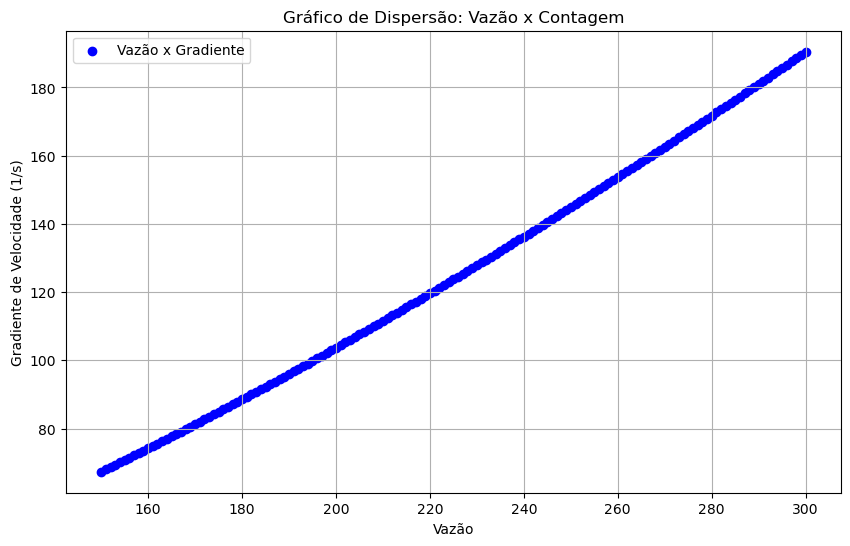

In [27]:
vazao_menor = 150 # Vazão mínima em L/s.
vazao_maior = 300 # Vazão máxima em L/s.

# Criando listas para armazenar os dados
vazoes = []
gradientes = []

for vazao in range(vazao_menor, vazao_maior+1):
    Grad_final_nova = gradiente_floc(vazao, V, nc, Aesc, Rh, Lr, lcanal, espac, n_esp, g, Ro, mi)
    
    # Adicionando os valores às listas
    vazoes.append(vazao)
    gradientes.append(Grad_final_nova)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(vazoes, gradientes, color='blue', label='Vazão x Gradiente')
plt.title('Gráfico de Dispersão: Vazão x Contagem')
plt.xlabel('Vazão')
plt.ylabel('Gradiente de Velocidade (1/s)')
plt.legend()
plt.grid(True)
plt.show()

### Fim do roteiro
**https://github.com/lnrddev/**